# wall_generator output parsing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Usage
!wall_generator

 
                          __   ___       ___  __       ___  __   __  
 |  |  /\  |    |        / _` |__  |\ | |__  |__)  /\   |  /  \ |__) 
 |/\| /~~\ |___ |___ ___ \__> |___ | \| |___ |  \ /~~\  |  \__/ |  \ 
 
 Please provide a lattice file. Format:
 wall_generator <lattice>
   Example: wall_generator lat.bmad
 wall_generator <lattice> <n_angles> <ds>
   Example: wall_generator lat.bmad 8


In [3]:
# Run
!wall_generator lat.bmad

 
                          __   ___       ___  __       ___  __   __  
 |  |  /\  |    |        / _` |__  |\ | |__  |__)  /\   |  /  \ |__) 
 |/\| /~~\ |___ |___ ___ \__> |___ | \| |___ |  \ /~~\  |  \__/ |  \ 
 
 Creating wall for lattice file: lat.bmad                                                                                            
 Using number of angles:            2
[INFO] bmad_parser:
    Parsing lattice file(s). This might take a minute or so...
[INFO] bmad_parser:
    Found in file: "NO_DIGESTED". No digested file will be created
[MESSAGE | 2021-AUG-26 13:05:29] bmad_parser:
    Lattice parse time(min): 0.00
 Written: wall.out


In [4]:
FILE = 'wall.out'

In [5]:
# Get the header
with open(FILE) as f:
    header = f.readline().split()[1:]
    units = f.readline().split()[1:]
header, units

(['x',
  'normal_x',
  'y',
  'normal_y',
  'z',
  'normal_z',
  'ix_ele',
  'angle_index',
  's'],
 ['m', '1', 'm', '1', 'm', '1', '1', '1', 'm'])

In [6]:
# This identifies which angle was used. When angle == 2, this is the +x and -x wall contours. 
header[7]

'angle_index'

In [7]:
# Load the file, and extract the positions
dat = np.loadtxt(FILE, comments='#')

at_angle0 = dat[:,7] == 0
at_angle1 = dat[:,7] == 1

x0 = dat[at_angle0][:,0]
x1 = dat[at_angle1][:,0]
z0 = dat[at_angle0][:,4]
z1 = dat[at_angle1][:,4]

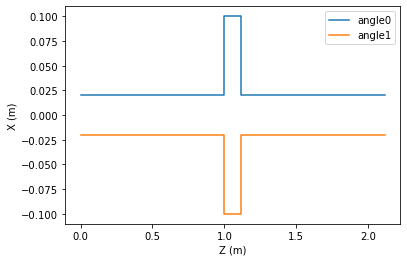

In [8]:
plt.plot(z0, x0, label='angle0')
plt.plot(z1, x1, label='angle1')
plt.xlabel('Z (m)')
plt.ylabel('X (m)')
plt.legend()